In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from prettytable import PrettyTable
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from text_function import text_tokenizer

In [19]:
true_posts = pd.read_csv('Data/True.csv', usecols=['title', 'text'])
true = true_posts['title']
# entire_text = ' '.join(true.to_list())

fake_posts = pd.read_csv('Data/Fake.csv', usecols=['title', 'text'])
fake = fake_posts['title']

vectorizer = CountVectorizer(tokenizer=text_tokenizer)

In [6]:
X_transform = vectorizer.fit_transform(true)
slowa = vectorizer.get_feature_names_out(true)
m = sum(X_transform.toarray())
ind = np.argpartition(m, -10)[-10:]

Tokeny najczęściej występujących słów w tytułach z pliku True

In [7]:
print(slowa[ind])

['state' 'white' 'say' 'korea' 'republican' 'trump' 'north' 'hous' 'senat'
 'russia']


Ilość najczęściej występujących tokenów wraz z indeksami

In [8]:
print(m[ind])
# indeksy slowa najczesciej wystepujace
print(ind)

[ 804  815 2987  881  973 5420  925 1465 1189  914]
[7816 9116 7189 4495 6815 8492 5573 3923 7316 7062]


   Najczęściej występujące tokeny w tytułach z pliku True
    Wizualizacja - wykres

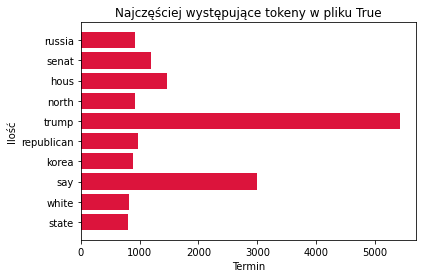

In [9]:
plt.barh(slowa[ind], m[ind], color='crimson')
plt.title('Najczęściej występujące tokeny w pliku True')
plt.ylabel('Ilość')
plt.xlabel('Termin')
plt.show()

Najczęściej występujące tokeny w tytułach z pliku True
Wizualizacja - Pretty table

In [10]:
columns = ["Termin","Ilość"]
newTable = PrettyTable()
newTable.add_column(columns[0], slowa[ind])
newTable.add_column(columns[1], m[ind])
newTable.sortby = columns[1]
print(newTable)

+------------+-------+
|   Termin   | Ilość |
+------------+-------+
|   state    |  804  |
|   white    |  815  |
|   korea    |  881  |
|   russia   |  914  |
|   north    |  925  |
| republican |  973  |
|   senat    |  1189 |
|    hous    |  1465 |
|    say     |  2987 |
|   trump    |  5420 |
+------------+-------+


Najczęściej występujące tokeny słów w tytułach z pliku Fake

In [21]:
X_transform = vectorizer.fit_transform(fake)
f_slowa = vectorizer.get_feature_names_out(fake)
f_sum = sum(X_transform.toarray())
f_ind = np.argpartition(f_sum, -10)[-10:]

Tokeny najczęściej występujących słów w tytułach z pliku Fake

In [23]:
print(f_slowa[f_ind])

['tweet' 'black' 'break' 'clinton' 'presid' 'obama' 'hillari' 'video'
 'watch' 'trump']


Ilości najczęściej wystęujących tokenów wraz z indeksami

In [24]:
print(f_sum[f_ind])
# indeksy slowa najczesciej wystepujace
print(f_ind)

[ 922  932 1031 1136 1191 2493 2190 8377 1943 8685]
[11745  1188  1429  2127  8688  7743  5320 12143 12365 11577]


Wizualizacja - wykres

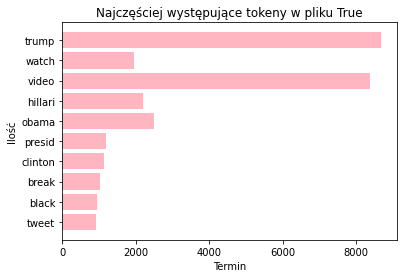

In [26]:
plt.barh(f_slowa[f_ind], f_sum[f_ind], color='lightpink')
plt.title('Najczęściej występujące tokeny w pliku True')
plt.xlabel('Ilość')
plt.ylabel('Termin')
plt.show()

Tabela

In [27]:
columns = ["Termin","Ilość"]
newTable = PrettyTable()
newTable.add_column(columns[0], f_slowa[f_ind])
newTable.add_column(columns[1], f_sum[f_ind])
newTable.sortby = columns[1]
print(newTable)

+---------+-------+
|  Termin | Ilość |
+---------+-------+
|  tweet  |  922  |
|  black  |  932  |
|  break  |  1031 |
| clinton |  1136 |
|  presid |  1191 |
|  watch  |  1943 |
| hillari |  2190 |
|  obama  |  2493 |
|  video  |  8377 |
|  trump  |  8685 |
+---------+-------+


In [47]:
tvectorizer = TfidfVectorizer(tokenizer=text_tokenizer)
TX_transform = tvectorizer.fit_transform(true)
# print(TX_transform.toarray())
top = sum(TX_transform.toarray())
ind2 = np.argpartition(top, -10)[-10:]

10 najbardziej kluczowych tokeny

In [48]:
print(slowa[ind2])

['state' 'white' 'korea' 'hous' 'senat' 'say' 'north' 'republican'
 'russia' 'trump']


In [49]:
print(top[ind2])
print(ind2)

[202.412027   210.79843534 223.96858335 334.2019234  293.27145143
 532.83798562 229.11848171 254.91437762 233.88170866 794.36913366]
[7816 9116 4495 3923 7316 7189 5573 6815 7062 8492]


Wizualizacja kluczowych tokenów tytułów z pliku True

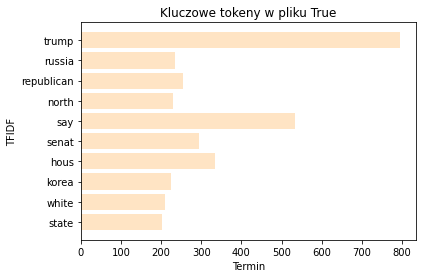

In [51]:
plt.barh(slowa[ind2], top[ind2], color='bisque')
plt.title('Kluczowe tokeny w pliku True')
plt.xlabel('TFIDF')
plt.ylabel('Termin')
plt.show()

In [50]:
columns = ["Termin","TFIDF"]
newTable = PrettyTable()
newTable.add_column(columns[0], slowa[ind2])
newTable.add_column(columns[1], top[ind2])
newTable.sortby = columns[1]
print(newTable)

+------------+--------------------+
|   Termin   |       TFIDF        |
+------------+--------------------+
|   state    | 202.41202700016686 |
|   white    | 210.79843534479036 |
|   korea    | 223.96858334753762 |
|   north    | 229.1184817106866  |
|   russia   | 233.8817086555213  |
| republican | 254.91437762100287 |
|   senat    | 293.27145142764334 |
|    hous    | 334.2019233960819  |
|    say     | 532.8379856173508  |
|   trump    | 794.3691336560518  |
+------------+--------------------+


Top 10 dokumentów, które zawierają najwięcej tokenów

In [52]:
n = np.sum(X_transform.toarray(), axis=1)
print(true[n])

7     Factbox: Trump on Twitter (Dec 29) - Approval ...
8            Trump on Twitter (Dec 28) - Global Warming
9     Alabama official to certify Senator-elect Jone...
8            Trump on Twitter (Dec 28) - Global Warming
7     Factbox: Trump on Twitter (Dec 29) - Approval ...
                            ...                        
8            Trump on Twitter (Dec 28) - Global Warming
8            Trump on Twitter (Dec 28) - Global Warming
10    Jones certified U.S. Senate winner despite Moo...
7     Factbox: Trump on Twitter (Dec 29) - Approval ...
9     Alabama official to certify Senator-elect Jone...
Name: title, Length: 23481, dtype: object


10 najważniejszych tokenów na podstawie wagi binarnej

In [53]:
vectorizer_bw = CountVectorizer(tokenizer=text_tokenizer, binary= True)

X_transform_bw = vectorizer_bw.fit_transform(true)
slowa_bw = vectorizer_bw.get_feature_names_out()
sum_bw = sum(X_transform_bw.toarray())
ind_bw = np.argpartition(sum_bw, -10)[-10:]

In [54]:
print(slowa_bw[ind_bw])

['state' 'korea' 'white' 'russia' 'republican' 'north' 'senat' 'trump'
 'say' 'hous']


In [55]:
print(sum_bw[ind_bw])
print(ind_bw)

[ 801  825  812  908  972  920 1164 5389 2984 1435]
[7816 4495 9116 7062 6815 5573 7316 8492 7189 3923]


Wizualizacja najważniejszych tokenów na podstawie wagi binarnej

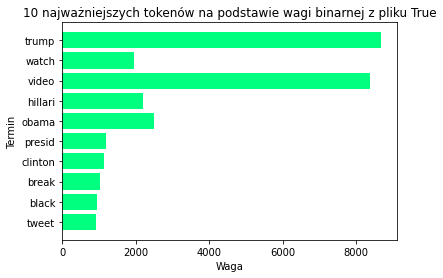

In [58]:
plt.barh(f_slowa[f_ind], f_sum[f_ind], color='springgreen')
plt.title('10 najważniejszych tokenów na podstawie wagi binarnej z pliku True')
plt.xlabel('Waga')
plt.ylabel('Termin')
plt.show()

In [60]:
columns = ["Termin","Waga"]
newTable = PrettyTable()
newTable.add_column(columns[0], slowa[ind2])
newTable.add_column(columns[1], top[ind2])
newTable.sortby = columns[1]
print(newTable)

+------------+--------------------+
|   Termin   |        Waga        |
+------------+--------------------+
|   state    | 202.41202700016686 |
|   white    | 210.79843534479036 |
|   korea    | 223.96858334753762 |
|   north    | 229.1184817106866  |
|   russia   | 233.8817086555213  |
| republican | 254.91437762100287 |
|   senat    | 293.27145142764334 |
|    hous    | 334.2019233960819  |
|    say     | 532.8379856173508  |
|   trump    | 794.3691336560518  |
+------------+--------------------+
